In [1]:
import pandas as pd, numpy as np, requests

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import mpld3
mpld3.enable_notebook()

In [9]:
data3=pd.read_excel('export3.xlsx')

In [11]:
data3

,2014,2015,2016,2017,2014.1,2015.1,2016.1,2017.1,2014.2,2015.2,2016.2,2017.2,2014.3,2015.3,2016.3,2017.3,Régió,Hosszúság,Szélesség,Iparág
A M C SRL,NaN,NaN,NaN,NaN,18131027.0,22173039.0,24390005.0,27881270.0,18.131,22.173,24.390,27.881,NaN,NaN,NaN,NaN,Alsó-háromszék,25.589216,45.839135,Kereskedelem
ABC IMPEX SRL,120.0,132.0,132.0,145.0,30363973.0,31956498.0,33071733.0,36539530.0,30.364,31.956,33.072,36.540,0.253,0.242,0.251,0.252,Udvarhelyszék,25.290034,46.289768,"Kisipar, műanyag"
ABRAZIV SRL,NaN,NaN,NaN,NaN,0.0,0.0,0.0,5483275.0,0.000,0.000,0.000,5.483,NaN,NaN,NaN,NaN,Gyergyószék,25.575165,46.717425,Kereskedelem
ADIMAG COM IMPEX SRL,NaN,NaN,NaN,NaN,44031925.0,47437389.0,48827471.0,57106224.0,44.032,47.437,48.827,57.106,NaN,NaN,NaN,NaN,Marosszék,24.548819,46.537905,Építkezés
AFEROM TRANS SRL,NaN,NaN,NaN,NaN,12096492.0,12531454.0,13592056.0,13341348.0,12.096,12.531,13.592,13.341,NaN,NaN,NaN,NaN,Csíkszék,25.786071,46.361412,Szállítás
AGER SRL,NaN,NaN,NaN,NaN,10322534.0,10511810.0,10629185.0,14549472.0,10.323,10.512,10.629,14.549,NaN,NaN,NaN,NaN,Alsó-háromszék,26.029142,45.667196,"Kisipar, műanyag"
AGM ECO CORPORATE SRL,6.0,2.0,36.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Udvarhelyszék,25.311729,46.316023,Élelmiszer
AGRICO M SRL,NaN,NaN,NaN,NaN,5701521.0,6376915.0,7643351.0,9400301.0,5.702,6.377,7.643,9.400,NaN,NaN,NaN,NaN,Felső-háromszék,26.132670,46.006632,Mezőgazdaság
AGRO PAN STAR SRL,NaN,NaN,NaN,NaN,2845996.0,13372911.0,20905425.0,19033775.0,2.846,13.373,20.905,19.034,NaN,NaN,NaN,NaN,Alsó-háromszék,25.793258,45.870001,Élelmiszer
AGRO ROM IMPEX SRL,NaN,NaN,NaN,NaN,21671970.0,29093421.0,43731414.0,52824141.0,21.672,29.093,43.731,52.824,NaN,NaN,NaN,NaN,Marosszék,24.531839,46.526013,Kereskedelem


In [12]:
from mpl_toolkits.mplot3d import axes3d

In [63]:
x=list(data3['Hosszúság'].values)
y=list(data3['Szélesség'].values)
s=data3['2017.2'].values
formfactor=0.68
s=list((s*1000)**formfactor)

In [64]:
cs={"Élelmiszer":"#543005",
"Ásványvíz":"#9e0142",
"Mezőgazdaság":"#d53e4f",
"Kereskedelem":"#f46d43",
"Szolgáltatás":"#fdae61",
"Vendéglátó":"#fee08b",
"Szállítás":"#ffffbf",
"Textil":"#e6f598",
"Gyógyszer, vegyipar":"#abdda4",
"Építkezés":"#66c2a5",
"Fa, bútor":"#3288bd",
"Kisipar, műanyag":"#5e4fa2",
"Nehézipar, bányászat":"#40004b",
"Energia":"#762a83"}

In [65]:
sectors2=list(cs.keys())
c=[cs[data3['Iparág'].values[k]] for k in range(len(data3['Iparág'].values))]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: Object of type ndarray is not JSON serializable

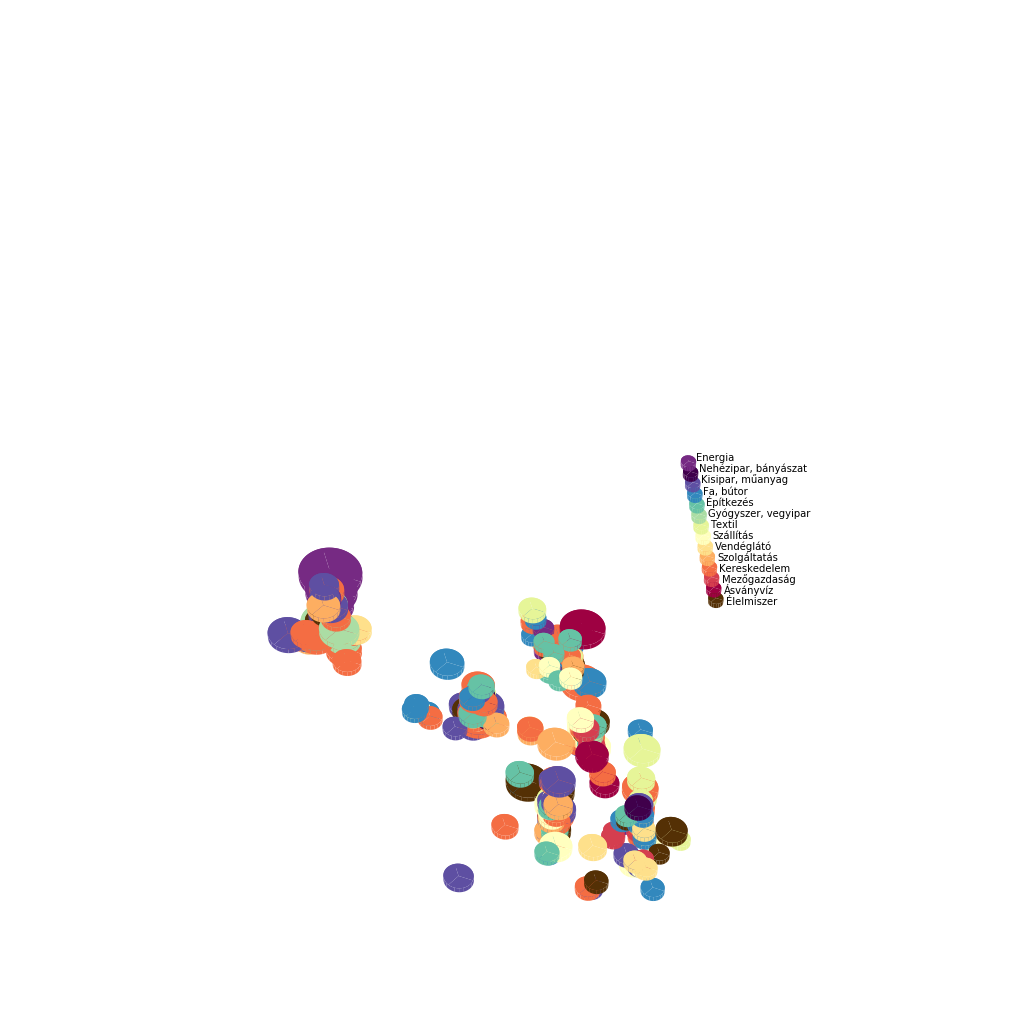

In [87]:
fig=plt.figure(figsize=(14,14))
ax=axes3d.Axes3D(fig,azim=-70,elev=55)
ax._axis3don = False

scale=1
xlim=np.array([24.25,26.5])
ylim=np.array([45.57,48.00])

points=[]
for j in range(len(x)):
    index=j
    hindex=0
    r=(s[index]/100000000)**0.25
    for p in range(len(points)):
        if (np.sqrt((points[p][0]-x[index])**2+(points[p][1]-y[index])**2)<((abs(r-points[p][2]))*1.3)):
            hindex+=1 
    
    points.append([x[index],y[index],r])
    
    # Cylindrical shell   
    phi = np.linspace(0, 2 * np.pi, 100) 
    r1 = np.ones(100) 
    h1 = np.linspace(hindex, hindex+1, 100) 

    x1 = r * np.outer(np.cos(phi), r1) + x[index]
    y1 = r * np.outer(np.sin(phi), r1) + y[index]
    z1 = 1 * np.outer(np.ones(np.size(r1)), h1) 

    # Top cover 
    phi_a = np.linspace(0, 2 * np.pi, 100) 
    h2 = np.ones(100)               
    r2 = np.linspace(0, 1, 100) 

    phi_grid, r_grid = np.meshgrid(phi_a, r2)
    x2 = r * np.cos(phi_grid) * r_grid + x[index]
    y2 = r * np.sin(phi_grid) * r_grid + y[index]
    z2 = (hindex+1) * np.ones([100,100])

    #walls
    ax.plot_surface(x1*scale, y1*scale, z1,  rstride=5, cstride=100, linewidth=0.1, alpha=1, shade=False,color=c[index]) 
    #top cyl
    ax.plot_surface(x2*scale, y2*scale, z2,  rstride=100, cstride=34, linewidth=0.1, alpha=1, shade=False,color=c[index]) 

for w in range(len(sectors2)):
    r=0.033
    # Cylindrical shell   
    phi = np.linspace(0, 2 * np.pi, 100) 
    r1 = np.ones(100) 
    h1 = np.linspace(w, w+1, 100) 

    x1 = r * np.outer(np.cos(phi), r1) + 26.05-0.02*w
    y1 = r * np.outer(np.sin(phi), r1) + 47.34+0.03*w
    z1 = 1 * np.outer(np.ones(np.size(r1)), h1) 

    # Top cover 
    phi_a = np.linspace(0, 2 * np.pi, 100) 
    h2 = np.ones(100)               
    r2 = np.linspace(0, 1, 100) 

    phi_grid, r_grid = np.meshgrid(phi_a, r2)
    x2 = r * np.cos(phi_grid) * r_grid + 26.05-0.02*w
    y2 = r * np.sin(phi_grid) * r_grid + 47.34+0.03*w
    z2 = (w+1) * np.ones([100,100])

    ax.plot_surface(x1*scale, y1*scale, z1,  rstride=5, cstride=100, linewidth=0.1, alpha=1, shade=False,color=colors[w]) 
    ax.plot_surface(x2*scale, y2*scale, z2,  rstride=100, cstride=34, linewidth=0.1, alpha=1, shade=False,color=colors[w])
    ax.text2D(0.71-w*0.0023, 0.41+w*0.011,sectors2[w], transform=ax.transAxes)

ax.set_zlim([0,70])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

In [88]:
fig.savefig('3d.svg')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
